In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext line_profiler


#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [2]:
Case1=dfnpy.DFN_Model()
Case1.loadDFN('..\Datas\DFN_400fracs.dat')
#Case1.loadDFN('..\Datas\DFN_50fracs.dat')

[Input] Reading "..\Datas\DFN_400fracs.dat" DFN file....
Dimension= 3
Number of Points= 1094
Number of Fractures= 98
Number of Intersections= 329
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Fracture 20 has Intersections of  [10, 225, 226, 227]
Fracture 40 has Intersections of  [20, 166, 281, 282, 283, 284, 285, 286, 287]
Fracture 60 has Intersections of  [227]
Fracture 80 has Intersections of  [45, 46, 274, 275, 317]
Fracture 97 has Intersections of  [49, 50, 150, 151, 202]


In [3]:
h_mesh_frac=100.0/2.0
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:81(Total) 21(Edge) 59(Trace)
[Mesh] Number of Nodes:241(Total) 63(Edge) 177(Trace) 1(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:88(Total) 21(Edge) 67(Trace)
[Mesh] Number of Nodes:264(Total) 63(Edge) 201(Trace) 0(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:76(Total) 20(Edge) 55(Trace)
[Mesh] Number of Nodes:226(Total) 60(Edge) 165(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:74(Total) 23(Edge) 50(Trace)
[Mesh] Number of Nodes:220(Total) 69(Edge) 150(Trace) 1(Source)
------------Setting up Fracture 5------------
[Mesh] Genetrated...
[Mesh] Discontinous E

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:13(Total) 12(Edge) 1(Trace)
[Mesh] Number of Nodes:39(Total) 36(Edge) 3(Trace) 0(Source)
------------Setting up Fracture 83------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:9(Total) 8(Edge) 1(Trace)
[Mesh] Number of Nodes:27(Total) 24(Edge) 3(Trace) 0(Source)
------------Setting up Fracture 84------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:15(Total) 13(Edge) 2(Trace)
[Mesh] Number of Nodes:45(Total) 39(Edge) 6(Trace) 0(Source)
------------Setting up Fracture 85------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:22(Total) 15(Edge) 7(Trace)
[Mesh] Number of Nodes:66(Total) 45(Edge) 21(Trace) 0(Source)
------------Setting up Fracture 86------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:19(Total) 14


------------ Fracture 0------------


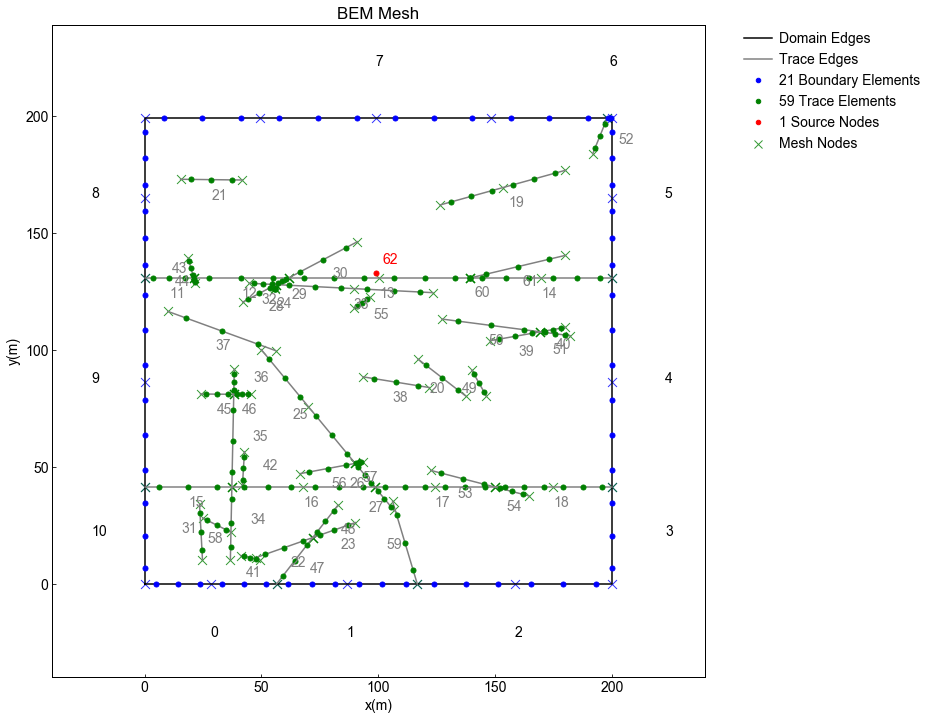

In [16]:
i=0
print('\n------------ Fracture %d------------'%(i))
Case1.FlowSolver.showMesh(i,scale=3.0)

## Set up boundary conditions

In [7]:
#2. Set up boundary condition automatically
def getBCTable(FracBDIDs,BCtype,BCvalue):
    Tables=[]
    for fracBDID in FracBDIDs:
        fracID=fracBDID[0]
        IntIDs=fracBDID[1]
        for idx in IntIDs:
            Tables.append((fracID,idx,BCtype,BCvalue))
    return Tables

#Well1
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(0)
BCtype='Dirichlet'
BCvalue=15e6
#Format (fracID,BdID,BCtype,BCvalue)
Inlets=getBCTable(FracBDIDs,BCtype,BCvalue)

#Well2, Well3
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(1)
BCtype='Dirichlet'
BCvalue=10e6
#Format (fracID,BdID,BCtype,BCvalue)
Outlets=getBCTable(FracBDIDs,BCtype,BCvalue)

In [10]:
for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    print('-------Frac',fracID,'--------')
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

-------Frac 3 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(55, 15000000.0)]
-------Frac 30 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(19, 15000000.0)]
-------Frac 58 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(13, 15000000.0)]
-------Frac 0 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(62, 10000000.0)]
-------Frac 2 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(61, 10000000.0)]
-------Frac 41 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(15, 10000000.0)]
-------Frac 46 --------
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(12, 10000000.0)]


## Set up frac props and solve

Frac Aperature Mean Min Max 0.1995470696863364 0.1064187644580902 0.39164223186068486 mm
Frac Permeability Mean Min Max 3.928053882150813e-09 9.437461190655403e-10 1.3333333333333334e-08 m^2


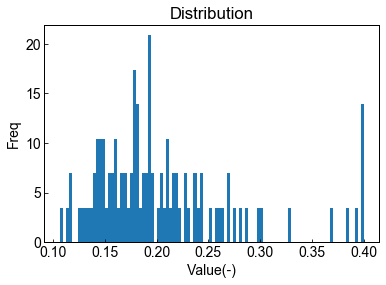

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#Ref1:https://doi.org/10.1007/s12182-016-0132-3
#Ref2:https://doi.org/10.1016/0148-9062(70)90025-2
def getLogNormFracAperature(NumFracs,mu, sigma):
    mm=1e-3 #meter
    d = np.random.lognormal(mu, sigma, NumFracs)
    return d*mm

#Log normal fracture aperature distribution and cubic law permeability calculation
mu, sigma = -2.1, 0.27 # mean and standard deviation from  Ref2
mu, sigma = -1.7, 0.27 # mean and standard deviation from  Ref2

d_frac=getLogNormFracAperature(Case1.FracNets.NumFracs,mu, sigma)
#d_frac=getLogNormFracAperature(1000,mu, sigma)
print('Frac Aperature Mean Min Max',np.mean(d_frac/1e-3),np.min(d_frac/1e-3),np.max(d_frac/1e-3),'mm')

d_frac[0:4]=0.4*1e-3;
#Cubic law fracture permeability
k_frac=d_frac**2/12
print('Frac Permeability Mean Min Max',np.mean(k_frac),np.min(k_frac),np.max(k_frac),'m^2')

count, bins, ignored = plt.hist(d_frac/1e-3, 100, density=True, align='mid')
plt.title('Distribution')
plt.xlabel('Value(-)')
plt.ylabel('Freq')
plt.show()

#Random distributed prop
Case1.setFracProperties(perm_array=k_frac,aperature_array=d_frac)

#Uniform distribution
#Case1.setFracProperties(perm=3e-10,aperature=0.01)

In [ ]:
Case1.solveFlow(max_iters=10000,tolerance=1e-8)

[Solution] #DOFs= 241
[Solution] #DOFs= 264
[Solution] #DOFs= 226
[Solution] #DOFs= 220
[Solution] #DOFs= 39
[Solution] #DOFs= 42
[Solution] #DOFs= 78
[Solution] #DOFs= 36
[Solution] #DOFs= 45
[Solution] #DOFs= 48
[Solution] #DOFs= 27
[Solution] #DOFs= 33
[Solution] #DOFs= 21
[Solution] #DOFs= 21
[Solution] #DOFs= 39
[Solution] #DOFs= 21
[Solution] #DOFs= 27
[Solution] #DOFs= 57
[Solution] #DOFs= 24
[Solution] #DOFs= 33
[Solution] #DOFs= 45
[Solution] #DOFs= 54
[Solution] #DOFs= 81
[Solution] #DOFs= 27
[Solution] #DOFs= 75
[Solution] #DOFs= 30
[Solution] #DOFs= 54
[Solution] #DOFs= 51
[Solution] #DOFs= 21
[Solution] #DOFs= 75
[Solution] #DOFs= 61
[Solution] #DOFs= 36
[Solution] #DOFs= 54
[Solution] #DOFs= 39
[Solution] #DOFs= 57
[Solution] #DOFs= 57
[Solution] #DOFs= 75
[Solution] #DOFs= 48
[Solution] #DOFs= 69
[Solution] #DOFs= 75
[Solution] #DOFs= 69
[Solution] #DOFs= 55
[Solution] #DOFs= 18
[Solution] #DOFs= 132
[Solution] #DOFs= 36
[Solution] #DOFs= 51
[Solution] #DOFs= 37
[Solutio

### Check mass balance error and write Paraview file

In [9]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 0 Boundary ID 149 Flux=0.00141220519417516 [m^3]
[Outlet Flux] Frac 64 Boundary ID 23 Flux=-0.00011451672522846008 [m^3]
[Outlet Flux] Frac 64 Boundary ID 24 Flux=-0.00011200259893556385 [m^3]
[Outlet Flux] Frac 0 Boundary ID 150 Flux=-0.00011710696328028553 [m^3]
[Outlet Flux] Frac 24 Boundary ID 18 Flux=-0.00010498993553768254 [m^3]
[Outlet Flux] Frac 43 Boundary ID 22 Flux=-0.00013031885398699257 [m^3]
[Outlet Flux] Frac 45 Boundary ID 47 Flux=-0.00011222870031037178 [m^3]
[Outlet Flux] Frac 46 Boundary ID 30 Flux=-0.00011795748767154282 [m^3]
[Outlet Flux] Frac 13 Boundary ID 8 Flux=-4.720518264642133e-05 [m^3]
[Outlet Flux] Frac 0 Boundary ID 151 Flux=-0.00014431966926714356 [m^3]
[Outlet Flux] Frac 6 Boundary ID 55 Flux=-0.00014627973148167184 [m^3]
[Outlet Flux] Frac 62 Boundary ID 14 Flux=-0.00011336604601859123 [m^3]
[Outlet Flux] Frac 81 Boundary ID 47 Flux=-0.0001518127254563601 [m^3]
[Mass Balance] 1.0057435407282225e-07


In [10]:
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_50fracs.msh',fname='DFN_50fracs.vtu')
Mesh=Case1.writeDFN(fname='DFN_50fracs.vtp')

Pressure Range= 1000000.0 2000000.0
[Output] Saved VTK mesh and solution file Results\DFN_50fracs_solution.vtu) !
[Output] Saved Geometry VTK file Results\DFN_50fracs_DFN.vtp) !


In [10]:
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_400fracs.msh',fname='DFN_400fracs.vtp')
Mesh=Case1.writeDFN(fname='DFN_400fracs.vtp')

Pressure Range= 1020241.0624642451 2000000.0
[Output] Saved VTK mesh and solution file Results\DFN_400fracs_solution.vtu) !
[Output] Saved Geometry VTK file Results\DFN_400fracs_DFN.vtp) !


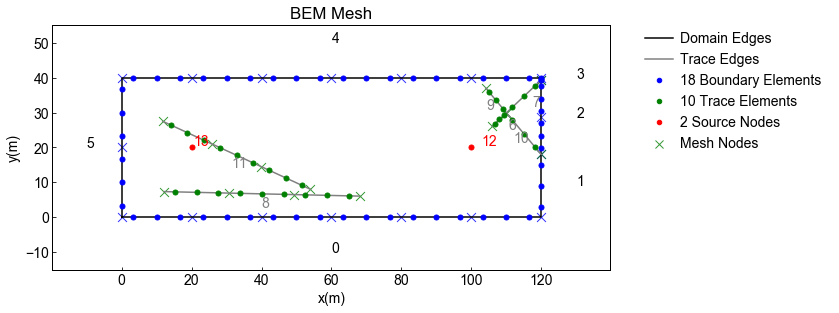

In [14]:
Case1.FlowSolver.showMesh(13,scale=2.0)

[Visulization] Plotting Solution


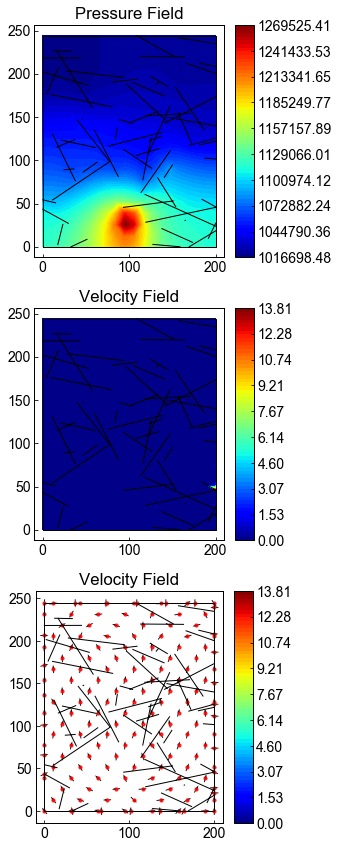

In [32]:
xx=Case1.FlowSolver.showSolution(0)

In [9]:
Case1.FlowSolver.SubProblems[0].get_Solution((4.23257950e+01,-1.77635684e-14))

(42.325795, -1.77635684e-14)
Checking... [0. 0.] [42.32579495  0.        ] 1.1270726555220778e-05 True
Checking... [42.32579495  0.        ] [38.3031806  54.12620744] 1.1270726555220778e-05 True
Checking... [38.3031806  54.12620744] [17.30861752 83.57990299] 1.1270726555220778e-05 False
Checking... [17.30861752 83.57990299] [-7.28787386 88.50487933] 1.1270726555220778e-05 False
Checking... [-7.28787386 88.50487933] [-9.33136561 88.91404942] 1.1270726555220778e-05 False
Checking... [-9.33136561 88.91404942] [-13.29867167  73.67944021] 1.1270726555220778e-05 False
Checking... [-13.29867167  73.67944021] [-23.79321613  33.37998229] 1.1270726555220778e-05 False
Checking... [-23.79321613  33.37998229] [0. 0.] 1.1270726555220778e-05 False
[1, 2]
Pts on the 1 Edge element


(0.0, -0.0, -0.0)

In [9]:
1791.4729203052057-1791.4729182283866

2.076819100693683e-06

In [72]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

(0.0, 0.0)


0.0

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [69]:
np.dot([1,1,1],[2,2,2])

6